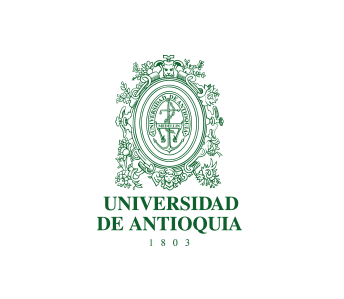

# Análisis Estadístico de Señales

Estudiantes:
- Juan Camilo Carvajal Sierra - 1010124738
- Ana María Uribe Betancur - 1000537653
- Duvan Vega Cardona - 1003896233

##OBJETIVOS

###General
Aplicar técnicas para el anàlisis de señales biomédicas en el dominio del tiempo mediante técnicas estadísticas.

###Específicos
- Comprender las características que diferencian las señales determinísticas de las estocásticas.
- Implementar diferentes técnicas para el análisis estadístico de señales, e interpretar los resultados obtenidos.

## Procedimiento

### 1. Implementación de funciones
Implemente una función que permita calcular el valor cuadrático medio (RMS) de una señal. El valor RMS se define en forma discreta con N número de muestras, como:

$$
x_{RMS}=\left[\frac{1}{N}\sum_{i=1}^{N}x(i)^2\right]^{\frac{1}{2}}
$$

Para este laboratorio, se le suministra el archivo de datos denominado signals.mat, el cual corresponde al registro de señales ECG y EMG.
Las señales se adquirieron a una tasa de muestreo de 1024 Hz. El registro correspondiente a las señales tal cual se registraron corresponde al campo asRecording de los archivos entregados. Las señales se sometieron a un proceso de filtrado el cual corresponde al campo filtered.



In [ ]:
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy.fft import fft, fftfreq
from scipy.signal import find_peaks
from scipy.stats import levene, shapiro, ttest_ind, mannwhitneyu
from sklearn.feature_selection import mutual_info_regression
from statsmodels.tsa.stattools import adfuller

In [ ]:
# Se cargan los datos
mat = scipy.io.loadmat('signals.mat')
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [ ]:
# Se explora la orgaización de los datos dentro del archivo
info = []
for key in mat:
    if not key.startswith('__'):
        arr = mat[key]
        info.append({
            'Variable': key,
            'Tipo': str(type(arr)),
            'Forma': arr.shape,
            'Dimensiones': len(arr.shape),
            'dtype': arr.dtype if isinstance(arr, np.ndarray) else 'N/A'
        })

df_info = pd.DataFrame(info)
display(df_info)

,Variable,Tipo,Forma,Dimensiones,dtype
0,Fs,<class 'numpy.ndarray'>,"(1, 1)",2,uint16
1,ECG_asRecording,<class 'numpy.ndarray'>,"(1, 30720)",2,float64
2,ECG_filtered,<class 'numpy.ndarray'>,"(1, 30720)",2,float64
3,EMG_filtered1,<class 'numpy.ndarray'>,"(1, 30721)",2,float64
4,EMG_filtered2,<class 'numpy.ndarray'>,"(1, 30721)",2,float64
5,EMG_asRecording1,<class 'numpy.ndarray'>,"(1, 30721)",2,float64
6,EMG_asRecording2,<class 'numpy.ndarray'>,"(1, 30721)",2,float64


En el DataFrame se evidencia que existe una señal inicial y filtrada para el ECG, y dos para el EMG.

In [ ]:
# Se extraen las señales
ecg_raw = mat['ECG_asRecording'].squeeze()
ecg_filtered = mat['ECG_filtered'].squeeze()
emg_raw1 = mat['EMG_asRecording1'].squeeze()
emg_filtered1 = mat['EMG_filtered1'].squeeze()
emg_raw2 = mat['EMG_asRecording2'].squeeze()
emg_filtered2 = mat['EMG_filtered2'].squeeze()
fs = mat["Fs"][0][0]

In [ ]:
# Función que calcula el RMS
def calcular_rms(signal):
    return np.sqrt(np.mean(np.square(signal)))

In [ ]:
# Se calcula la función para el ECG antes y después del filtro
rms_ECG_raw = float(calcular_rms(ecg_raw))
rms_ECG_filtered = float(calcular_rms(ecg_filtered))

print(f"RMS del ECG sin filtrar: {rms_ECG_raw}")
print(f"RMS del ECG filtrado: {rms_ECG_filtered}")

RMS del ECG sin filtrar: 4392.9682937490725
RMS del ECG filtrado: 286.30557115249496


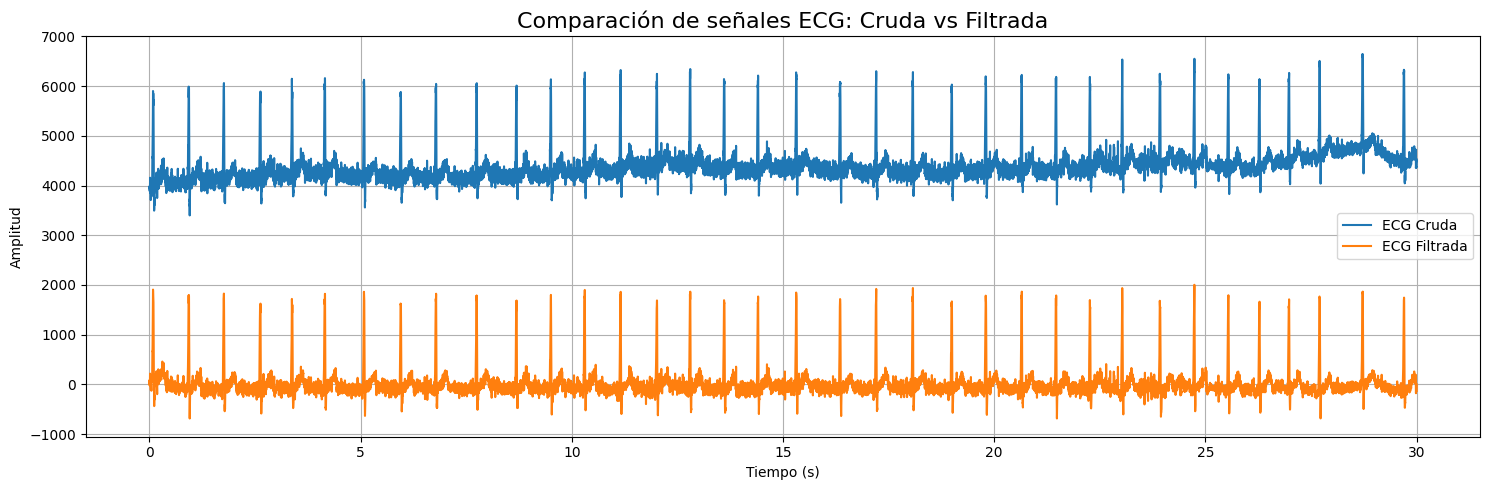

In [ ]:
# Graficar ambas señales
t = np.arange(len(ecg_raw)) / fs

plt.figure(figsize=(15, 5))
plt.plot(t, ecg_raw, label='ECG Cruda')
plt.plot(t, ecg_filtered, label='ECG Filtrada')
plt.title("Comparación de señales ECG: Cruda vs Filtrada", fontsize=16)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Se calcula la función para el EMG antes y después del filtro
rms_EMG_raw1 = float(calcular_rms(emg_raw1))
rms_EMG_filtered1 = float(calcular_rms(emg_filtered1))
rms_EMG_raw2 = float(calcular_rms(emg_raw2))
rms_EMG_filtered2 = float(calcular_rms(emg_filtered2))

print(f"RMS del EMG 1 sin filtrar: {rms_EMG_raw1}")
print(f"RMS del EMG 1 filtrado: {rms_EMG_filtered1}")
print(f"\nRMS del EMG 2 sin filtrar: {rms_EMG_raw2}")
print(f"RMS del EMG 2 filtrado: {rms_EMG_filtered2}")

RMS del EMG 1 sin filtrar: 1689.3071005776176
RMS del EMG 1 filtrado: 90.58225968421819

RMS del EMG 2 sin filtrar: 3156.0533120007753
RMS del EMG 2 filtrado: 248.00722856373662


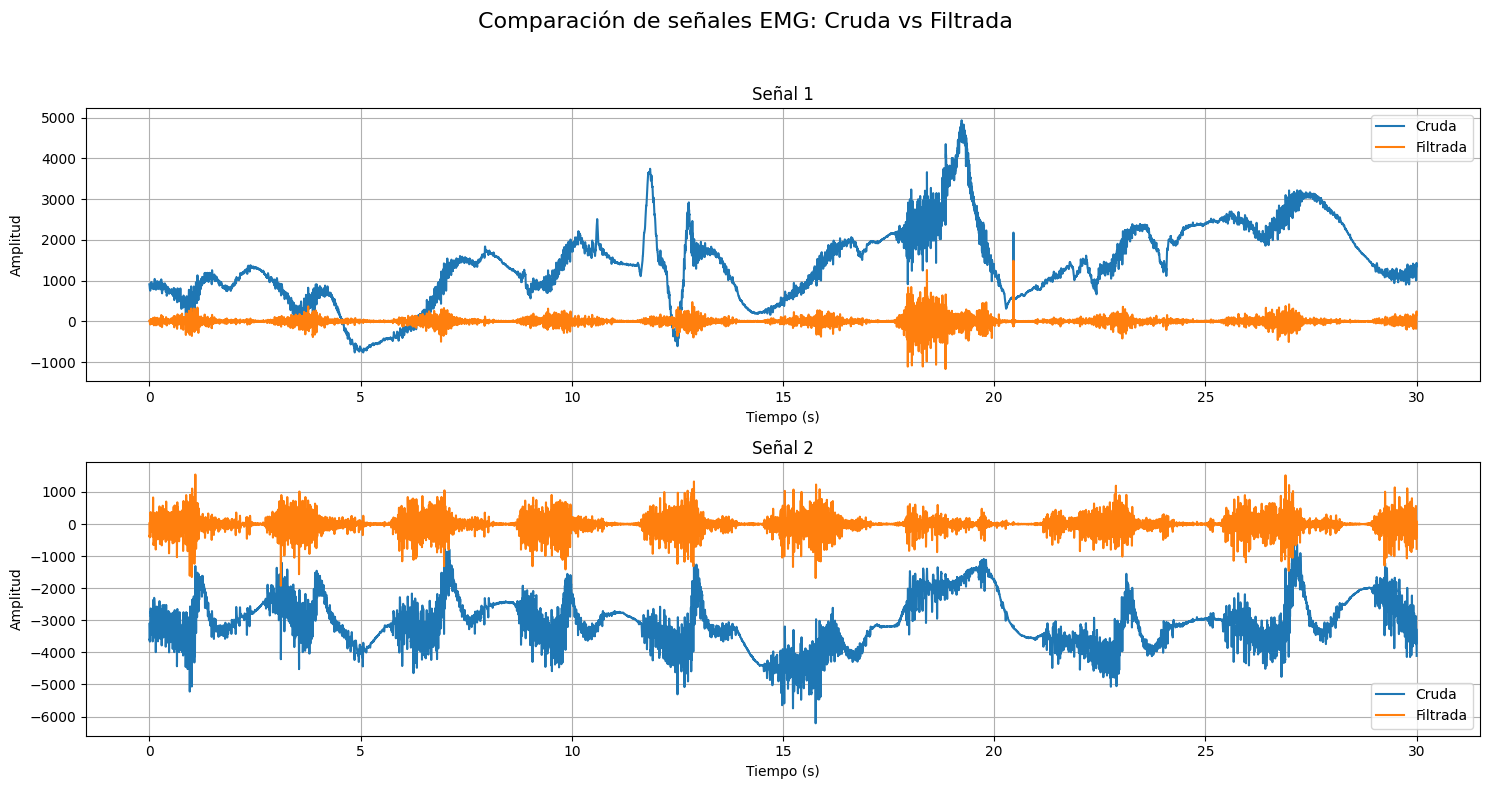

In [ ]:
# Graficar ambas señales
t = np.arange(len(emg_raw1)) / fs

fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=False)
fig.suptitle("Comparación de señales EMG: Cruda vs Filtrada", fontsize=16)

# Señal 1
axs[0].plot(t, emg_raw1, label='Cruda')
axs[0].plot(t, emg_filtered1, label='Filtrada')
axs[0].set_title("Señal 1")
axs[0].set_xlabel("Tiempo (s)")
axs[0].set_ylabel("Amplitud")
axs[0].legend()
axs[0].grid(True)

# Señal 2
axs[1].plot(t, emg_raw2, label='Cruda')
axs[1].plot(t, emg_filtered2, label='Filtrada')
axs[1].set_title("Señal 2")
axs[1].set_xlabel("Tiempo (s)")
axs[1].set_ylabel("Amplitud")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

La función para el cálculo del RMS produjo valores coherentes con lo observado en las gráficas: las señales crudas presentan offsets considerables que incrementan su energía. Tras el filtrado, estos desplazamientos fueron eliminados, lo que se reflejó en una reducción significativa del RMS. Esto demuestra que el filtrado no solo mejora la visualización de la señal, sino que también impacta positivamente en las métricas estadísticas, permitiendo una representación más precisa de la actividad fisiológica medida.

### 2. Análisis estadístico de ECG

- A partir de la información suministrada en el archivo .mat, determine el tiempo de duración de las señales, cree un vector de tiempo.

Retomando el código para la visualización anterior, el vector de tiempo de obtiene así.

In [ ]:
t = np.arange(len(ecg_raw)) / fs
t.max()

np.float64(29.9990234375)

Como inicialmente se observó que las señales tienen la misma forma, se asume un mismo vector de tiempo para ambas y se observa que la señal tiene una duración de 30 segundos.

- Grafique la señal sin filtrar y filtrada, compárelas. Comente lo que observa, y describa cómo debe ser el comportamiento del filtro que se utilizó. Recuerde las frecuencias de interés de la señal ECG.

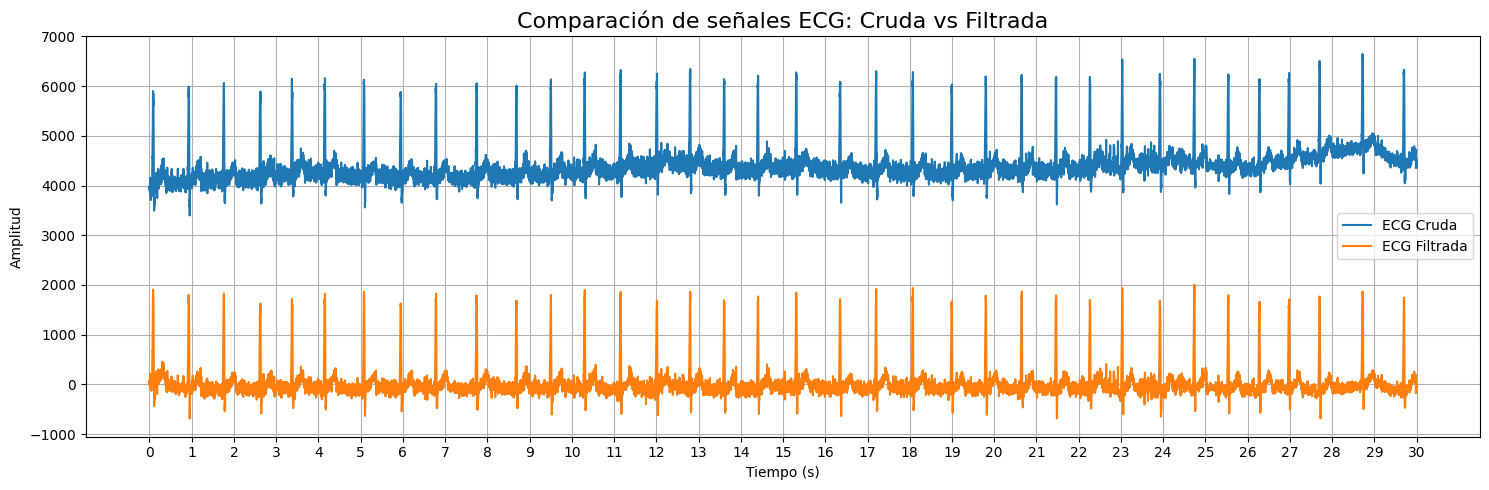

In [ ]:
plt.figure(figsize=(15, 5))
plt.plot(t, ecg_raw, label='ECG Cruda')
plt.plot(t, ecg_filtered, label='ECG Filtrada')
plt.title("Comparación de señales ECG: Cruda vs Filtrada", fontsize=16)
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.xticks(np.arange(0,31))
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

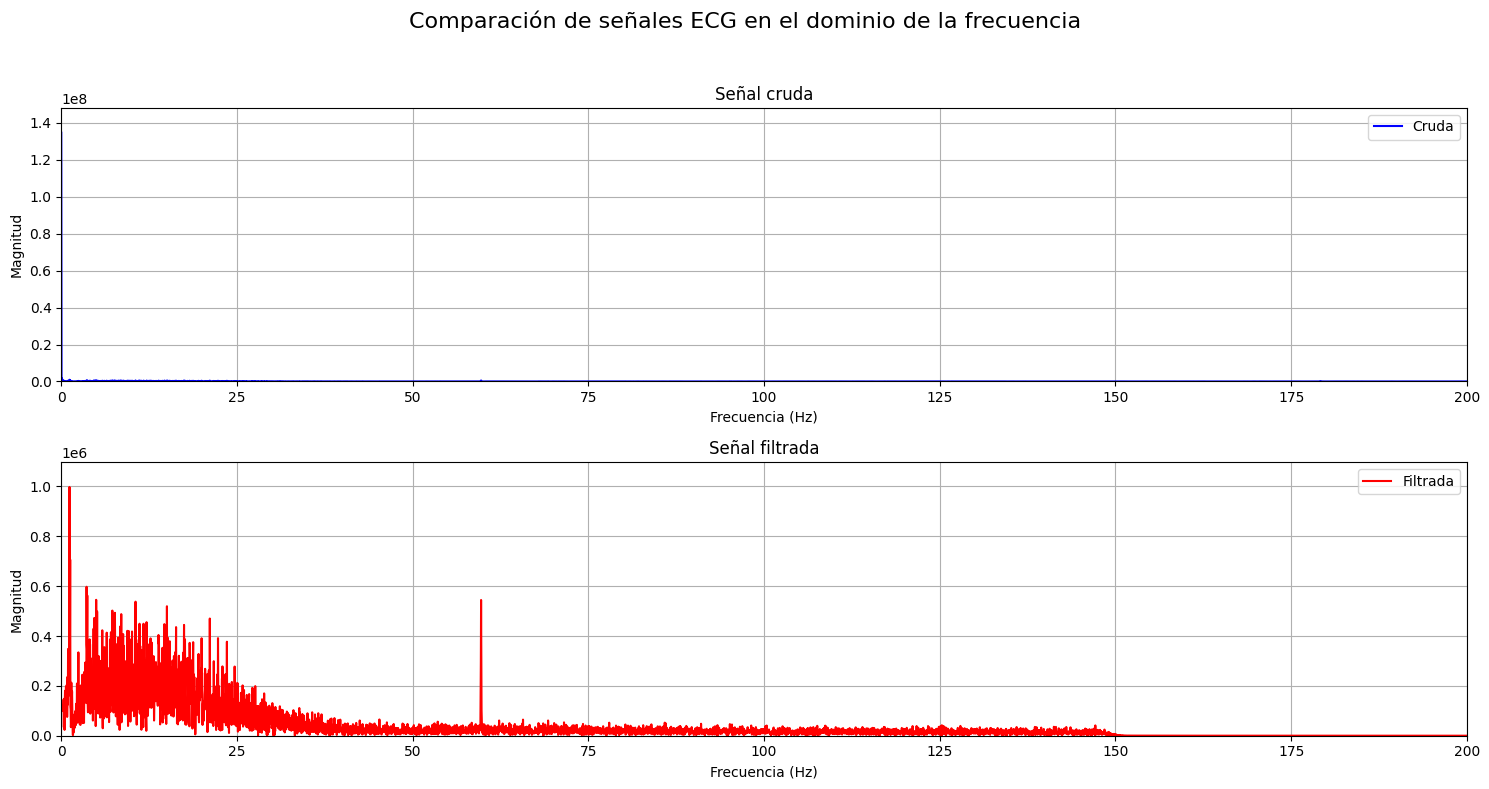

In [ ]:
frecuencias = []
magnitudes = []

for i in [ecg_raw, ecg_filtered]:
  N = len(i)
  yf = fft(i)
  xf = fftfreq(N, 1/fs)
  half_N = N // 2
  frec = xf[:half_N]
  mag = np.abs(yf[:half_N])
  frecuencias.append(frec)
  magnitudes.append(mag)

fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=False)
fig.suptitle("Comparación de señales ECG en el dominio de la frecuencia", fontsize=16)

# Señal cruda
axs[0].plot(frecuencias[0], magnitudes[0], color="blue", label='Cruda')
axs[0].set_title("Señal cruda")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud")
axs[0].set_xlim(0, 200) # Límite eje X
axs[0].set_ylim(0, np.max(magnitudes[0])*1.1)  # Límite eje Y automático
axs[0].legend()
axs[0].grid(True)

# Señal filtrada
axs[1].plot(frecuencias[1], magnitudes[1], color="red", label='Filtrada')
axs[1].set_title("Señal filtrada")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud")
axs[1].set_xlim(0, 200)  # Límite eje X
axs[1].set_ylim(0, np.max(magnitudes[1])*1.1)  # Límite eje Y automático
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


Puede observarse que la gráfica para la señal cruda brinda poca información y presenta dificultades en la visualización. Esto se da debido a que los límites para el eje Y (magnitudes) fueron establecidos de manera automática, tomando como referencia el valor máximo de magnitud. En el ECG hay ruidos en bajas frecuencias (menores a 1 Hz) asociados al movimiento respiratorio, desplazamientos del paciente o la mala conexión de electrodos; este ruido es el que genera el pico inicial en la señal.

Por otro lado, el ECG presenta ruidos en altas frecuencias (mayores a 150 Hz) asociados a interferencias externas por dispositivos electrónicos cercanos.

Haciendo un ajuste en el límite para el eje Y, puede mejorarse la visualización y notar que las frecuencias de interés (mayores a 1 Hz, menores a 150 Hz) no sufrieron ninguna modificación tras el filtrado, concluyendo que se usó un filtro pasa altas para eliminar el pico incial, y un pico pasa bajas en 150 Hz para eliminar interferencias electrónicas.

Fuente: https://www.mesimedical.com/es/conozca-la-configuracion-de-los-filtros-de-su-mesi-mtablet-ecg/#High-pass-filter

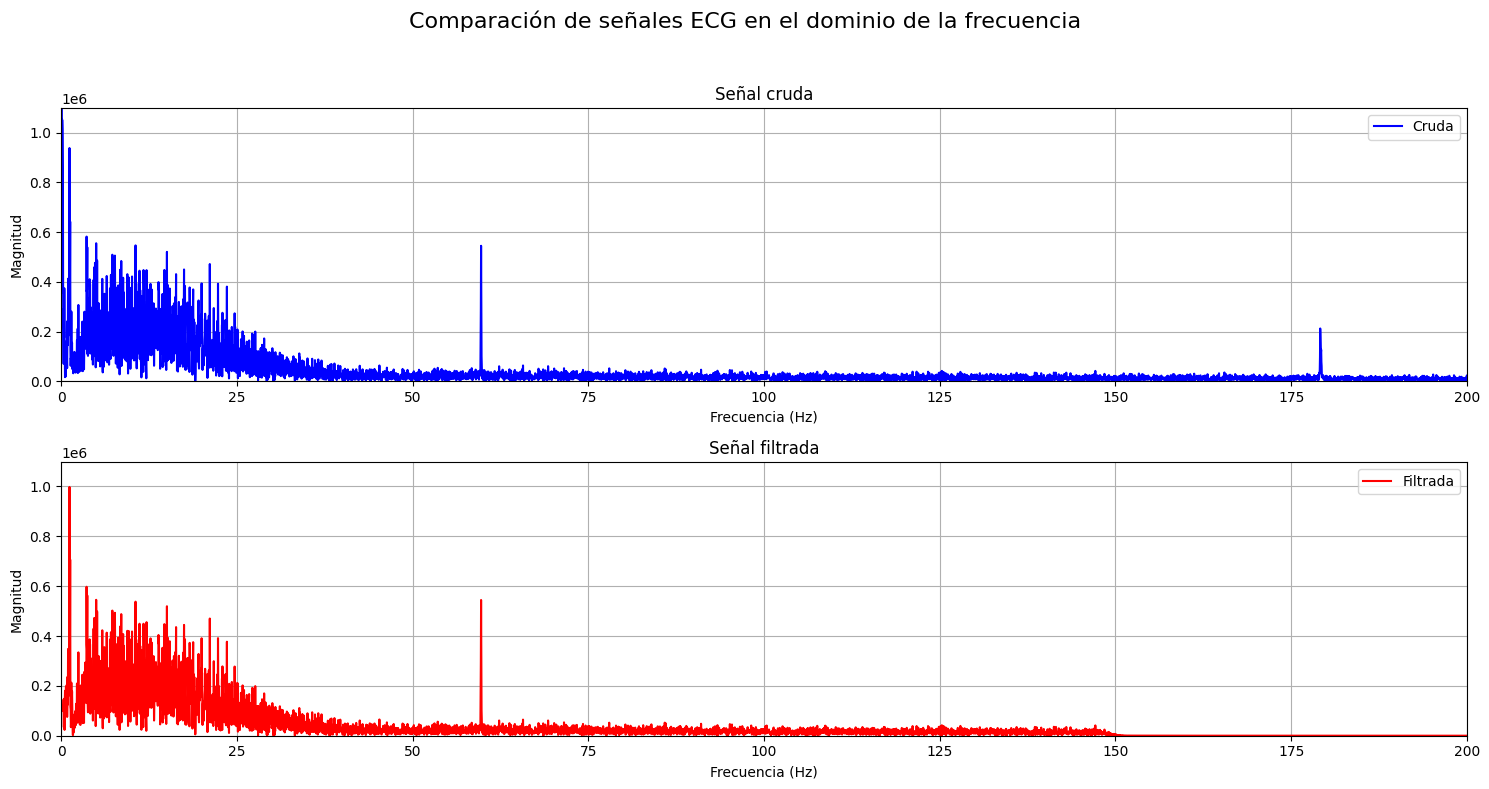

In [ ]:
frecuencias = []
magnitudes = []

for i in [ecg_raw, ecg_filtered]:
  N = len(i)
  yf = fft(i)
  xf = fftfreq(N, 1/fs)
  half_N = N // 2
  frec = xf[:half_N]
  mag = np.abs(yf[:half_N])
  frecuencias.append(frec)
  magnitudes.append(mag)

fig, axs = plt.subplots(2, 1, figsize=(15, 8), sharex=False)
fig.suptitle("Comparación de señales ECG en el dominio de la frecuencia", fontsize=16)

# Señal cruda
axs[0].plot(frecuencias[0], magnitudes[0], color="blue", label='Cruda')
axs[0].set_title("Señal cruda")
axs[0].set_xlabel("Frecuencia (Hz)")
axs[0].set_ylabel("Magnitud")
axs[0].set_xlim(0, 200) # Límite eje X
axs[0].set_ylim(0, 1.1e6)  # Límite eje Y
axs[0].legend()
axs[0].grid(True)

# Señal filtrada
axs[1].plot(frecuencias[1], magnitudes[1], color="red", label='Filtrada')
axs[1].set_title("Señal filtrada")
axs[1].set_xlabel("Frecuencia (Hz)")
axs[1].set_ylabel("Magnitud")
axs[1].set_xlim(0, 200)  # Límite eje X
axs[1].set_ylim(0, np.max(magnitudes[1])*1.1)  # Límite eje Y automático
axs[1].legend()
axs[1].grid(True)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

- Tome la señal tal cual se registró. De dicha señal, seleccione un ciclo cardiaco, grafique. Calcule el promedio, el valor RMS, la varianza y la desviación estándar del ciclo. Analice los resultados.

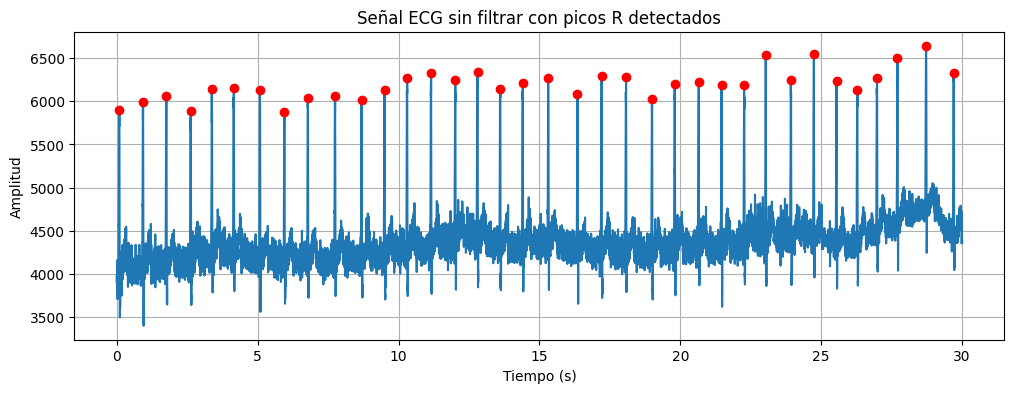

Se detectaron 36 picos R.


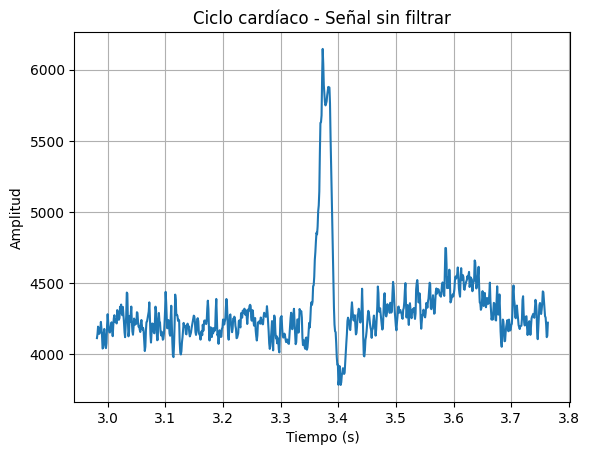


Estadísticas del ciclo cardiaco (señal sin filtrar):
Promedio: 4352.683223581671
RMS: 4365.992169494949
Varianza: 116036.3792418872
Desviación estándar: 340.6411296979377


In [ ]:
r_picos_raw, _ = find_peaks(ecg_raw, height=0.5*np.max(ecg_raw), distance=fs*0.5)
valores_picos = ecg_raw[r_picos_raw]

# Filtrar picos erroneos
indices_filtrados = valores_picos >= 5500
r_picos_raw = r_picos_raw[indices_filtrados]

plt.figure(figsize=(12, 4))
plt.plot(t, ecg_raw)
plt.plot(t[r_picos_raw], ecg_raw[r_picos_raw], 'ro')
plt.title('Señal ECG sin filtrar con picos R detectados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

print(f"Se detectaron {len(r_picos_raw)} picos R.")

# Seleccionamos un ciclo (entre dos picos R consecutivos)
ciclo_inicio = r_picos_raw[4]
ciclo_fin = r_picos_raw[5]
ciclo_raw = ecg_raw[ciclo_inicio:ciclo_fin]
inicio = r_picos_raw[4] - int(len(ciclo_raw)/2)
fin = r_picos_raw[4] + int(len(ciclo_raw)/2)
ciclo = ecg_raw[inicio:fin]
t_ciclo = t[inicio:fin]

plt.plot(t_ciclo, ciclo)
plt.title("Ciclo cardíaco - Señal sin filtrar")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

print("\nEstadísticas del ciclo cardiaco (señal sin filtrar):")
print("Promedio:", np.mean(ciclo_raw))
print("RMS:", calcular_rms(ciclo_raw))
print("Varianza:", np.var(ciclo_raw))
print("Desviación estándar:", np.std(ciclo_raw))

Las características estadísticas pueden deberse a la presencia de componentes no deseados superpuestos a la señal fisiológica.

- El promedio alto sugiere un offset de señal continua (la señal está centrada en un valor muy por encima de 0), esto puede darse debido a sensores o amplificadores.

- Un RMS cercano al promedio se debe a que la señal tiene una componente continua dominante.

- La varianza mide la variabilidad de la señal alrededor del promedio. Aquí, aunque hay un offset, hay también suficiente señal alterna (la actividad cardíaca más el ruido) para que la varianza no sea cero.

- La deviación estándar da cuenta deque la señal presentavariabilidad, pero el grueso de la energía está en la componente continua.


- Tome la señal filtrada. Repita el procedimiento anterior con esta señal, compare con los resultados obtenidos en el ítem anterior.

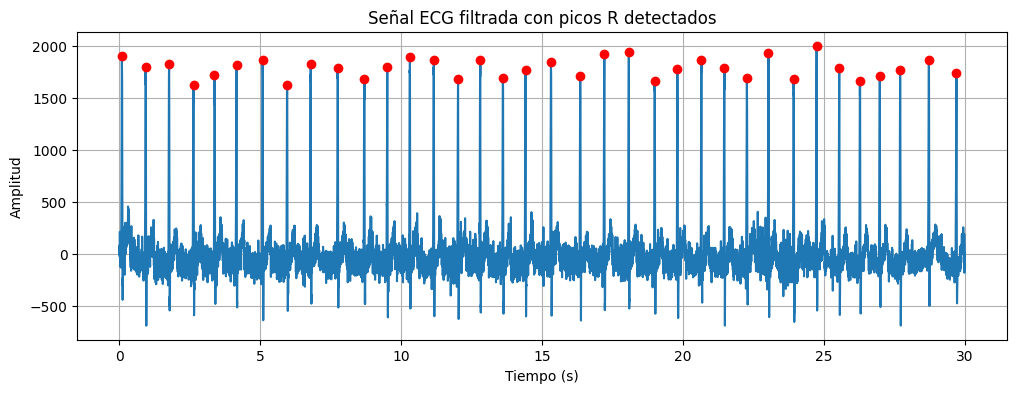

Se detectaron 36 picos R.


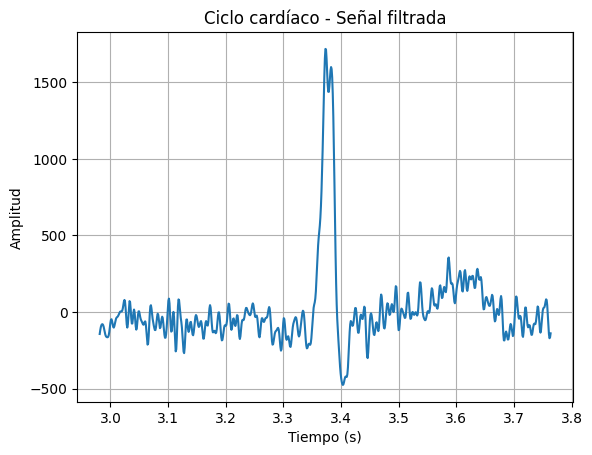


Estadísticas del ciclo cardiaco (señal filtrada):
Promedio: 40.87110478533409
RMS: 341.35094444116964
Varianza: 114850.02006450474
Desviación estándar: 338.89529365942036


In [ ]:
r_picos_filt, _ = find_peaks(ecg_filtered, height=0.5*np.max(ecg_filtered), distance=fs*0.5)

plt.figure(figsize=(12, 4))
plt.plot(t, ecg_filtered)
plt.plot(t[r_picos_filt], ecg_filtered[r_picos_filt], 'ro')
plt.title('Señal ECG filtrada con picos R detectados')
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.grid()
plt.show()

print(f"Se detectaron {len(r_picos_filt)} picos R.")

# Seleccionamos mismo ciclo en la señal filtrada
ciclo_inicio = r_picos_filt[4]
ciclo_fin = r_picos_filt[5]
ciclo_filt = ecg_filtered[ciclo_inicio:ciclo_fin]
inicio = r_picos_filt[4] - int(len(ciclo_filt)/2)
fin = r_picos_filt[4] + int(len(ciclo_filt)/2)
ciclo = ecg_filtered[inicio:fin]
t_ciclo_f = t[inicio:fin]

plt.plot(t_ciclo_f, ciclo)
plt.title("Ciclo cardíaco - Señal filtrada")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid()
plt.show()

print("\nEstadísticas del ciclo cardiaco (señal filtrada):")
print("Promedio:", np.mean(ciclo_filt))
print("RMS:", calcular_rms(ciclo_filt))
print("Varianza:", np.var(ciclo_filt))
print("Desviación estándar:", np.std(ciclo_filt))

- El promedio es muy cercano a 0, indicando que el offset de continua fue eliminado correctamente.
- El RMS es mucho más bajo que el valor en la señal sin filtrar. Esto muestra que ahora el RMS refleja principalmente la energía de la señal fisiológica, no la continua.
- La varianza y desviación estándar son muy similares a las de la señal sin filtrar. Esto muestra que las propiedades de la señal fisiológica real se conservan, y el filtro alteró predominantemente el offset, como era de interés.

Esto indica que el filtro fue bien diseñado: No distorsionó la porción de interés del ECG.


- Extraiga 15 ciclos de la señal filtrada, y para cada ciclo calcule el valor promedio y la varianza, grafique cada ciclo, y analice (gráfica y estadísticamente). ¿Se puede considerar que la señal es estacionaria?

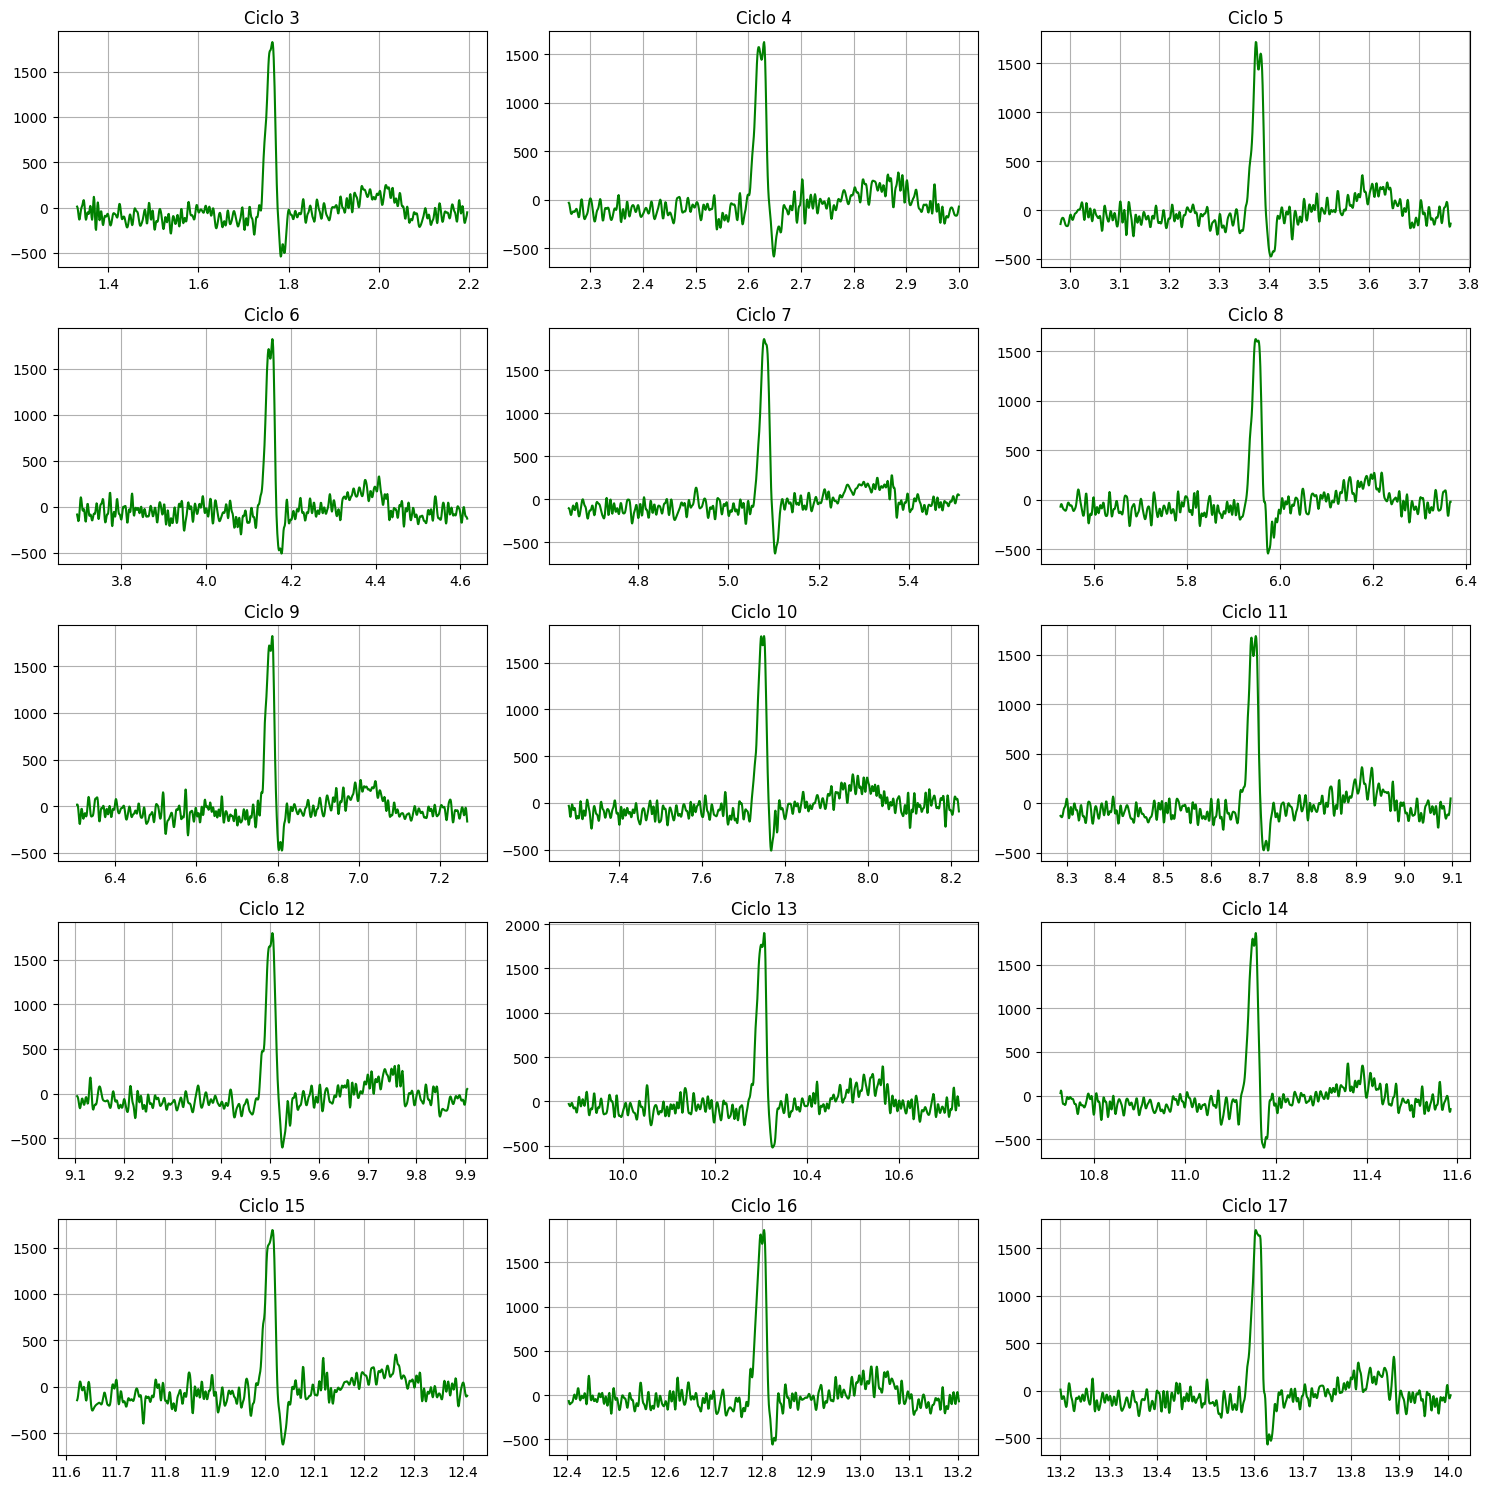


Estadísticas de los 15 ciclos:
    Ciclo   Promedio      Varianza
0       3 -11.520315  80803.126506
1       4 -12.854123  83227.466765
2       5  12.440104  79759.386541
3       6   3.015349  76840.912830
4       7  -5.184729  85208.792775
5       8  -2.698473  72070.491397
6       9   2.520664  72544.473444
7      10   2.674421  74591.824954
8      11  -2.863939  76553.141560
9      12  -4.770908  83494.082901
10     13  12.742338  86559.389855
11     14 -12.543547  87196.795028
12     15   2.983341  82764.017573
13     16  17.128315  87578.321831
14     17 -16.390184  82577.773625


In [ ]:
ciclos = []
tiempos_ciclos = []
promedios = []
varianzas = []

for i in range(2, 17):
    inicio = r_picos_filt[i]
    fin = r_picos_filt[i+1]
    ciclo = ecg_filtered[inicio:fin]
    inicio = r_picos_filt[i] - int(len(ciclo)/2)
    fin = r_picos_filt[i] + int(len(ciclo)/2)
    ciclo = ecg_filtered[inicio:fin]
    ciclos.append(ciclo)
    tiempo = t[inicio:fin]
    tiempos_ciclos.append(tiempo)
    promedios.append(np.mean(ciclo))
    varianzas.append(np.var(ciclo))

# Graficar los ciclos
fig, axs = plt.subplots(5, 3, figsize=(15, 15))
for i, ax in enumerate(axs.flatten()):
    ax.plot(tiempos_ciclos[i], ciclos[i],"g")
    ax.set_title(f"Ciclo {i+3}")
    ax.grid()
plt.tight_layout()

plt.show()

# Estadísticas de los 15 ciclos
df_stats = pd.DataFrame({
    'Ciclo': range(3, 18),
    'Promedio': promedios,
    'Varianza': varianzas
})

print("\nEstadísticas de los 15 ciclos:")
print(df_stats)

Se observa que los promedios fluctúan significativamente entre ciclos, con valores que oscilan entre aproximadamente -16.39 y 17.13, lo que indica que la media no se mantiene constante a lo largo del tiempo. Por otro lado, la varianza varía en un rango más acotado, entre 72,507 y 87,578, mostrando una dispersión moderada que sugiere cierta estabilidad.

Desde el enfoque de la estacionariedad, donde se requiere que tanto la media como la varianza permanezcan constantes, esta señal no puede considerarse estrictamente estacionaria debido a la variabilidad del promedio. Sin embargo, la estabilidad relativa de la varianza permite clasificarla como cuasi-estacionaria o débilmente estacionaria.


- Realice dos veces comparaciones entre dos ciclos cualquiera utilizando una prueba t. Determine estadísticamente si existe diferencia estadística entre los ciclos, Compruebe los supuestos necesarios para realizar una prueba t, esto es: Normalidad de la variable, independencia (se asume que los grupos son independientes), y homocedasticidad (use una prueba de Levene), finalmente realice la prueba t para determinar si existen diferencias entre los ciclos. Qué indica este análisis respecto de la estacionariedad, explique. De no cumplirse los requisitos, realice entonces un análisis no paramétrico (prueba U de Mann-Whitney).


1. Prueba de Normalidad: **Shapiro-Wilk**

Hipótesis
* H₀ (Hipótesis nula): Los datos siguen una distribución normal
* H₁ (Hipótesis alternativa): Los datos no siguen una distribución normal

Se utilizó un nivel de significancia de α = 0.05:
* Si p-valor > α , no rechazamos H₀, lo que sugiere que los datos provienen de una distribución normal
* Si p-valor ≤ α, rechazamos H₀, lo que indica que los datos no siguen una distribución normal

2. Independencia

- **Mutual Information** (dependencia general): Mide dependencia no lineal entre señales.
- **Cross-correlation** (para señales temporales): Evalúa si una señal está correlacionada con otra en distintos retardos (lags).

3. Prueba de Homocedasticidad: **Levene**

Hipótesis
* H₀: Las varianzas de los ciclos son iguales (homocedasticidad)
* H₁: Al menos una varianza difiere de las demás (heterocedasticidad)

Se utilizó un nivel de significancia de α = 0.05:
* Si p-valor > α, no rechazamos H₀, sugiriendo que las varianzas son iguales
* Si p-valor ≤ α, rechazamos H₀, indicando que las varianzas difieren significativamente

4. **U de Mann-Whitney**

Hipótesis
* H₀ (hipótesis nula): Las dos muestras provienen de la misma distribución (no hay diferencias en la mediana u orden general).

* H₁ (hipótesis alternativa): Las dos muestras provienen de distribuciones diferentes (una tiende a tener valores mayores o menores que la otra).

Se utilizó un nivel de significancia de α = 0.05:
* Si p-valor > α, no rechazamos H₀, las muestras pueden provenir de la misma distribución.

* Si p-valor ≤ α, rechazamos H₀, las muestras provienen de distribuciones distintas.

In [ ]:
# Comparaciónentre ciclos 1 y 5
ciclo1 = ciclos[0]
ciclo5 = ciclos[4]

# Normalidad con Shapiro-Wilk
_, p_norm_ciclo1 = stats.shapiro(ciclo1)
_, p_norm_ciclo5 = stats.shapiro(ciclo5)

print("\nPrueba de normalidad (Shapiro-Wilk):")
print(f"Ciclo 1: p-value = {p_norm_ciclo1}")
print(f"Ciclo 5: p-value = {p_norm_ciclo5}")

#Independencia
min_len = min(len(ciclo1), len(ciclo5))
s1 = np.array(ciclo1[:min_len]).reshape(-1, 1)
s2 = np.array(ciclo5[:min_len])

# Información mutua
mi = mutual_info_regression(s1, s2, discrete_features=False)
print(f"Información mutua entre señales: {mi[0]:.4f}")

# Correlación cruzada
s1 = ciclo1[:min_len] - np.mean(ciclo1[:min_len])
s2 = ciclo5[:min_len] - np.mean(ciclo5[:min_len])

xcorr = np.correlate(s1, s2, mode='full')
lags = np.arange(-len(s1)+1, len(s1))
max_corr = np.max(xcorr)
lag_max = lags[np.argmax(xcorr)]
print(f"Máxima correlación cruzada: {max_corr:.2f} en lag = {lag_max}")

# Homocedasticidad con la prueba de Levene
_, p_levene1 = stats.levene(ciclo1, ciclo5)
print(f"Prueba de Homocedasticidad Levene (Ciclo 1 vs Ciclo 5): p-value = {p_levene1:.6f}")

# Realizamos prueba t o U de Mann-Whitney según corresponda
if p_norm_ciclo1 > 0.05 and p_norm_ciclo5 > 0.05 and p_levene1 > 0.05:
  # Condiciones para prueba t satisfechas
  t_stat, p_value = stats.ttest_ind(ciclo1, ciclo5)
  print(f"Prueba t (Ciclo 1 vs Ciclo 5): t = {t_stat}, p-value = {p_value:.6f}")
  alpha = 0.05
  if p_value < alpha:
    print("Conclusión: Existe diferencia estadísticamente significativa entre los ciclos 1 y 5.")
  else:
    print("Conclusión: No existe diferencia estadísticamente significativa entre los ciclos 1 y 5.")
else:
  # Usamos prueba no paramétrica encaso de no cumplir las condiciones
  u_stat, p_value = stats.mannwhitneyu(ciclo1, ciclo5)
  print(f"Prueba U de Mann-Whitney (Ciclo 1 vs Ciclo 5): U = {u_stat}, p-value = {p_value}")
  alpha = 0.05
  if p_value < alpha:
    print("Conclusión: Existe diferencia estadísticamente significativa entre los ciclos 1 y 5.")
  else:
    print("Conclusión: No existe diferencia estadísticamente significativa entre los ciclos 1 y 5.")


Prueba de normalidad (Shapiro-Wilk):
Ciclo 1: p-value = 8.796193802743599e-43
Ciclo 5: p-value = 3.9266000508323e-43
Información mutua entre señales: 0.5033
Máxima correlación cruzada: 69803485.59 en lag = -6
Prueba de Homocedasticidad Levene (Ciclo 1 vs Ciclo 5): p-value = 0.964833
Prueba U de Mann-Whitney (Ciclo 1 vs Ciclo 5): U = 381654.0, p-value = 0.27690622622736927
Conclusión: No existe diferencia estadísticamente significativa entre los ciclos 1 y 5.


In [ ]:
# Comparaciónentre ciclos 10 y 15
ciclo10 = ciclos[9]
ciclo15 = ciclos[14]

# Normalidad con Shapiro-Wilk
_, p_norm_ciclo10 = stats.shapiro(ciclo10)
_, p_norm_ciclo15 = stats.shapiro(ciclo15)

print("\nPrueba de normalidad (Shapiro-Wilk):")
print(f"Ciclo 1: p-value = {p_norm_ciclo10}")
print(f"Ciclo 5: p-value = {p_norm_ciclo15}")

#Independencia
min_len = min(len(ciclo10), len(ciclo15))
s1 = np.array(ciclo10[:min_len]).reshape(-1, 1)
s2 = np.array(ciclo15[:min_len])

# Información mutua
mi = mutual_info_regression(s1, s2, discrete_features=False)
print(f"Información mutua entre señales: {mi[0]:.4f}")

# Correlación cruzada
s1 = ciclo10[:min_len] - np.mean(ciclo1[:min_len])
s2 = ciclo15[:min_len] - np.mean(ciclo5[:min_len])

xcorr = np.correlate(s1, s2, mode='full')
lags = np.arange(-len(s1)+1, len(s1))
max_corr = np.max(xcorr)
lag_max = lags[np.argmax(xcorr)]
print(f"Máxima correlación cruzada: {max_corr:.2f} en lag = {lag_max}")

# Homocedasticidad con la prueba de Levene
_, p_levene1 = stats.levene(ciclo10, ciclo15)
print(f"Prueba de Homocedasticidad Levene (Ciclo 10 vs Ciclo 15): p-value = {p_levene1:.6f}")

# Realizamos prueba t o U de Mann-Whitney según corresponda
if p_norm_ciclo10 > 0.05 and p_norm_ciclo15 > 0.05 and p_levene1 > 0.05:
  # Condiciones para prueba t satisfechas
  t_stat, p_value = stats.ttest_ind(ciclo10, ciclo15)
  print(f"Prueba t (Ciclo 10 vs Ciclo 15): t = {t_stat}, p-value = {p_value:.6f}")
  alpha = 0.05
  if p_value < alpha:
    print("Conclusión: Existe diferencia estadísticamente significativa entre los ciclos 10 y 15.")
  else:
    print("Conclusión: No existe diferencia estadísticamente significativa entre los ciclos 10 y 15.")
else:
  # Usamos prueba no paramétrica encaso de no cumplir las condiciones
  u_stat, p_value = stats.mannwhitneyu(ciclo10, ciclo15)
  print(f"Prueba U de Mann-Whitney (Ciclo 10 vs Ciclo 15): U = {u_stat}, p-value = {p_value}")
  alpha = 0.05
  if p_value < alpha:
    print("Conclusión: Existe diferencia estadísticamente significativa entre los ciclos 10 y 15.")
  else:
    print("Conclusión: No existe diferencia estadísticamente significativa entre los ciclos 10 y 15.")


Prueba de normalidad (Shapiro-Wilk):
Ciclo 1: p-value = 2.1270159328609726e-40
Ciclo 5: p-value = 6.323015659434106e-41
Información mutua entre señales: 0.2872
Máxima correlación cruzada: 64074002.25 en lag = -9
Prueba de Homocedasticidad Levene (Ciclo 10 vs Ciclo 15): p-value = 0.732893
Prueba U de Mann-Whitney (Ciclo 10 vs Ciclo 15): U = 351919.0, p-value = 0.1690935892351758
Conclusión: No existe diferencia estadísticamente significativa entre los ciclos 10 y 15.


Los resultados indican que, aunque existen diferencias visuales y numéricas entre los ciclos, estas no son estadísticamente significativas. En ambas comparaciones entre pares de ciclos (Ciclo 1 vs. Ciclo 5 y Ciclo 10 vs. Ciclo 15), se aplicaron las pruebas necesarias para determinar si era procedente realizar una prueba t. La prueba de normalidad de Shapiro-Wilk arrojó p-valores extremadamente bajos (e-43 y e-40), lo que indica una negación del supuesto de normalidad; por lo tanto, no es válido aplicar una prueba t paramétrica.

En consecuencia, se utilizó la prueba no paramétrica U de Mann-Whitney, que no requiere que los datos sigan una distribución normal. Los resultados para ambas comparaciones arrojaron p-valores mayores a 0.05 (0.276 y 0.169, respectivamente), lo que indica que no se encontraron diferencias estadísticamente significativas entre los pares de ciclos analizados. Además, la prueba de Levene mostró p-valores altos (0.964 y 0.732), lo que sugiere que se cumple el supuesto de homocedasticidad o igualdad de varianzas entre los grupos.

Estos resultados tienen implicaciones directas respecto a la estacionariedad de la señal. Aunque los valores medios fluctúan entre ciclos, el hecho de que no se encuentren diferencias significativas en sus distribuciones sugiere una relativa consistencia estructural en las características estadísticas de los ciclos, especialmente en términos de forma y dispersión. Esto refuerza la idea de que la señal podría considerarse cuasi-estacionaria o débilmente estacionaria, en la medida en que sus propiedades estadísticas no cambian drásticamente entre segmentos temporales.

- Compruebe los resultados anteriores aplicando una prueba de Dickey-Fuller a la señal (Estacionariedad)

5. **Dickey-Fuller**

Hipótesis
* H₀ (hipótesis nula): La serie temporal tiene una raíz unitaria, lo que significa que no es estacionaria.
* H₁ (hipótesis alternativa): La serie temporal no tiene raíz unitaria, es decir, es estacionaria.

In [ ]:
# Estacionariedad en la señal completa
result = adfuller(ecg_filtered)
print("\nPrueba de Dickey-Fuller para la señal ECG filtrada completa:")
print(f'ADF Statistic: {result[0]:.6f}')
print(f'p-value: {result[1]}')

critical_values = result[4]
print(f'Valores críticos:')
for key, value in critical_values.items():
    print(f'\t{key}: {value:.6f}')

if result[1] < 0.05:
    print("Conclusión: La señal es estacionaria según la prueba de Dickey-Fuller.")
else:
    print("Conclusión: La señal no es estacionaria según la prueba de Dickey-Fuller.")

# Análisis de estacionariedad por ciclos
print("\nPrueba de Dickey-Fuller para ciclos individuales:")
for i, ciclo in enumerate(ciclos[:5]):
    result = adfuller(ciclo)
    print(f'Ciclo {i+1}: ADF Statistic = {result[0]:.6f}, p-value = {result[1]:.6f}')
    if result[1] < 0.05:
        print(f"  El ciclo {i+1} es estacionario.")
    else:
        print(f"  El ciclo {i+1} no es estacionario.")


Prueba de Dickey-Fuller para la señal ECG filtrada completa:
ADF Statistic: -24.134107
p-value: 0.0
Valores críticos:
	1%: -3.430563
	5%: -2.861634
	10%: -2.566820
Conclusión: La señal es estacionaria según la prueba de Dickey-Fuller.

Prueba de Dickey-Fuller para ciclos individuales:
Ciclo 1: ADF Statistic = -0.397532, p-value = 0.910510
  El ciclo 1 no es estacionario.
Ciclo 2: ADF Statistic = -2.049529, p-value = 0.265287
  El ciclo 2 no es estacionario.
Ciclo 3: ADF Statistic = -2.469001, p-value = 0.123200
  El ciclo 3 no es estacionario.
Ciclo 4: ADF Statistic = 1.027281, p-value = 0.994546
  El ciclo 4 no es estacionario.
Ciclo 5: ADF Statistic = -2.109128, p-value = 0.240860
  El ciclo 5 no es estacionario.


El análisis combinado de la prueba de Dickey-Fuller y las pruebas estadísticas entre ciclos indica que, aunque la señal ECG filtrada completa es estacionaria en términos globales (ADF = -24.13, p < 0.01), los ciclos individuales no lo son, ya que sus p-valores son altos y los estadísticos ADF no alcanzan los umbrales críticos. Esto se refuerza con las pruebas no paramétricas (U de Mann-Whitney) entre pares de ciclos, que muestran que no hay diferencias significativas entre ellos, pero sí variabilidad local. En conjunto, esto sugiere que la señal ECG es estacionaria en escala global, pero presenta no estacionariedad local en sus ciclos, lo cual es coherente con la naturaleza dinámica de las señales fisiológicas.